In [332]:
%matplotlib inline

import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt

In [333]:
# Arrays to store object points and image points from all the images.

objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9, 0:6].T.reshape(-1,2)

objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('camera_cal/calibration*.jpg')

# Step through the list and search for chessboard corners
for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6), None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)


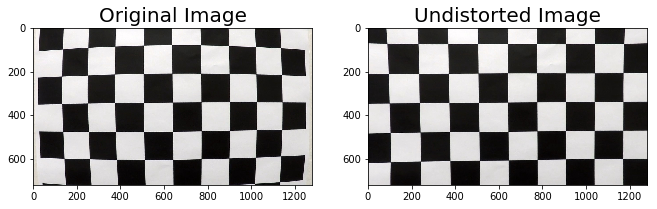

In [334]:
img = cv2.imread('camera_cal/calibration1.jpg')
dst = cv2.undistort(img, mtx, dist, None, mtx)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(11,5))
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.set_title('Original Image', fontsize=20)
ax2.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
ax2.set_title('Undistorted Image', fontsize=20)

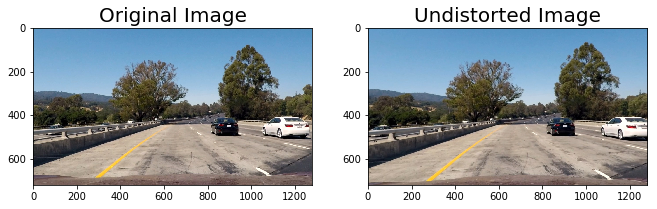

In [369]:
img = cv2.imread('test_images/test1.jpg')
dst = cv2.undistort(img, mtx, dist, None, mtx)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(11,5))
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.set_title('Original Image', fontsize=20)
ax2.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
ax2.set_title('Undistorted Image', fontsize=20)

In [336]:
def warp(img):
    img_size=(img.shape[1],img.shape[0])
    src=np.float32([[0.2*image.shape[1],0.95*image.shape[0]],[0.45*image.shape[1],0.64*image.shape[0]],[0.82*image.shape[1],0.95*image.shape[0]],[0.55*image.shape[1],0.64*image.shape[0]]])
    dst=np.float32([[0.2*image.shape[1],0.98*image.shape[0]],[0.2*image.shape[1],0.14*image.shape[0]],[0.82*image.shape[1],0.98*image.shape[0]],[0.82*image.shape[1],0.14*image.shape[0]]])
    M = cv2.getPerspectiveTransform(src,dst)
    return cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)

def perspectiveMatrix(img):
    img_size=(img.shape[1],img.shape[0])
    src=np.float32([[0.2*image.shape[1],0.95*image.shape[0]],[0.45*image.shape[1],0.64*image.shape[0]],[0.82*image.shape[1],0.95*image.shape[0]],[0.55*image.shape[1],0.64*image.shape[0]]])
    dst=np.float32([[0.2*image.shape[1],0.98*image.shape[0]],[0.2*image.shape[1],0.14*image.shape[0]],[0.82*image.shape[1],0.98*image.shape[0]],[0.82*image.shape[1],0.14*image.shape[0]]])
    M = cv2.getPerspectiveTransform(src,dst)
    return M

def perspectiveMatrixInverse(img):
    img_size=(img.shape[1],img.shape[0])
    src=np.float32([[0.2*image.shape[1],0.95*image.shape[0]],[0.45*image.shape[1],0.64*image.shape[0]],[0.82*image.shape[1],0.95*image.shape[0]],[0.55*image.shape[1],0.64*image.shape[0]]])
    dst=np.float32([[0.2*image.shape[1],0.98*image.shape[0]],[0.2*image.shape[1],0.14*image.shape[0]],[0.82*image.shape[1],0.98*image.shape[0]],[0.82*image.shape[1],0.14*image.shape[0]]])
    Minv = cv2.getPerspectiveTransform(dst,src)
    return Minv

def abs_sobel_thresh(img, orient='x', thresh_min=0, thresh_max=255):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    if(orient=='x'):
        sobel = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
    else:
        sobel = cv2.Sobel(gray, cv2.CV_64F, 0, 1)
    abs_sobel = np.absolute(sobel)
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    sbinary = np.zeros_like(scaled_sobel)
    sbinary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1
    return sbinary
    
def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0,ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1,ksize=sobel_kernel)
    abs_sobel=np.sqrt(np.square(sobely)+np.square(sobelx))
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    sbinary = np.zeros_like(scaled_sobel)
    sbinary[(scaled_sobel >= mag_thresh[0]) & (scaled_sobel <= mag_thresh[1])] = 1
    return sbinary

def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    abs_sobelx=np.sqrt(np.square(sobelx))
    abs_sobely=np.sqrt(np.square(sobely))
    direction=np.arctan2(abs_sobely, abs_sobelx)
    sbinary = np.zeros_like(direction)
    sbinary[(direction >= thresh[0]) & (direction <= thresh[1])] = 1
    return sbinary

In [370]:
# Read in an image
image = cv2.cvtColor(cv2.imread('test_images/test1.jpg'), cv2.COLOR_BGR2RGB)

def returnTransformedBinary(im,showImages=False):

    im2 = cv2.undistort(im, mtx, dist, None, mtx)
    kernel_size = 5
    im2 = cv2.GaussianBlur(im2, (kernel_size, kernel_size), 0)
    # Choose a Sobel kernel size
    ksize = 3 # Choose a larger odd number to smooth gradient measurements
    im2=warp(im2)
    
    # Apply each of the thresholding functions
    gradx = abs_sobel_thresh(im2, orient='x', thresh_min=20,thresh_max=120)
    mag_binary = mag_thresh(im2, sobel_kernel=ksize, mag_thresh=(0, 0))

    s=cv2.cvtColor(im2, cv2.COLOR_RGB2HLS)[:,:,2]
    l=cv2.cvtColor(im2, cv2.COLOR_RGB2HLS)[:,:,1]
    s_binary = np.zeros_like(mag_binary)
    s_binary[(s >100) & (s < 255) & (l > 10)] = 1

    combined = np.zeros_like(mag_binary)
    
    ###############Final Binary Image Is Made Below#######
    combined[(((gradx == 1) & (mag_binary == 0))|(s_binary==1) )] = 1
    
    if showImages:
        f, ((ax1, ax2, ax3), (ax4,ax5, ax6)) = plt.subplots(2, 3, sharey='col', sharex='row', figsize=(10,8))
        f.tight_layout()
        ax1.set_title('Original Image', fontsize=16)
        ax1.imshow(im, cmap='gray')
        ax2.set_title('Warped Image', fontsize=16)
        ax2.imshow(im2, cmap='gray')
        ax3.set_title('Gradx Image', fontsize=16)
        ax3.imshow(gradx, cmap='gray')
        ax4.set_title('Mag Binary Image', fontsize=16)
        ax4.imshow(mag_binary, cmap='gray')
        ax5.set_title('S Binary Image', fontsize=16)
        ax5.imshow(s_binary, cmap='gray')
        ax6.set_title('Final Image', fontsize=16)
        ax6.imshow(combined, cmap='gray')
    return combined

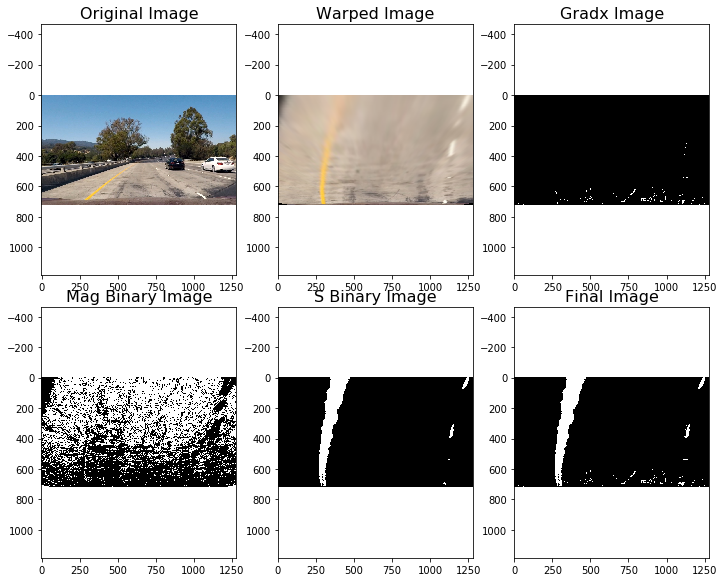

In [371]:
i=returnTransformedBinary(image,True)

In [372]:
#####Line class to store properties of lines#######
class Line():
    def __init__(self):
        # was the line detected in the last iteration?
        self.detected = False  
        # x values of the last n fits of the line
        self.recent_xfitted = [] 
        #average x values of the fitted line over the last n iterations
        self.bestx = None 
        #polynomial coefficients averaged over the last n iterations
        self.last_n_coefficients = []  
        #polynomial coefficients averaged over the last n iterations
        self.best_fit = None  
        #polynomial coefficients for the most recent fit
        self.current_fit = [np.array([False])]  
        #radius of curvature of the line in some units
        self.radius_of_curvature = None 
        #distance in meters of vehicle center from the line
        self.line_base_pos = None 
        #difference in fit coefficients between last and new fits
        self.diffs = np.array([0,0,0], dtype='float') 
        #x values for detected line pixels
        self.allx = None  
        #y values for detected line pixels
        self.ally = None

In [341]:
def measure_radius_of_curvature(x_values,num_rows):
    ym_per_pix = 30/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/700 # meters per pixel in x dimension
    # If no pixels were found return None
    y_points = np.linspace(0, num_rows-1, num_rows)
    y_eval = np.max(y_points)
    # Fit new polynomials to x,y in world space
    fit_cr = np.polyfit(y_points*ym_per_pix, x_values*xm_per_pix, 2)
    curverad = ((1 + (2*fit_cr[0]*y_eval*ym_per_pix + fit_cr[1])**2)**1.5) / np.absolute(2*fit_cr[0])
    return curverad

def get_intercepts(polynomial):
    bottom = polynomial[0]*720**2 + polynomial[1]*720 + polynomial[2]
    top = polynomial[0]*0**2 + polynomial[1]*0 + polynomial[2]
    return bottom, top

def get_distance_from_center(left_best_fit,right_best_fit):
    left_bottom,left_top=get_intercepts(left_best_fit)
    right_bottom,right_top=get_intercepts(right_best_fit)
    position = (left_bottom+right_bottom)/2
    distance_from_center = abs((640 - position)*3.7/700) 
    return (position,distance_from_center)    

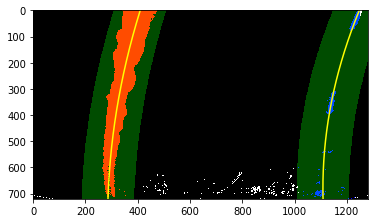

In [360]:
#binary_warped=combined.astype('uint8')

# Assuming you have created a warped binary image called "binary_warped"
# Take a histogram of the bottom half of the image

def findLinesFromScratch(binary_warped):
    #plt.imshow(binary_warped)
    plt.show()
    histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
    global left,right,n
    
    midpoint = np.int(histogram.shape[0]/2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint

    # Choose the number of sliding windows
    nwindows = 9
    # Set height of windows
    window_height = np.int(binary_warped.shape[0]/nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated for each window
    leftx_current = leftx_base
    rightx_current = rightx_base
    # Set the width of the windows +/- margin
    margin = 100
    # Set minimum number of pixels found to recenter window
    minpix = 30
    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        # Draw the windows on the visualization image
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),(0,255,0), 2) 
        cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),(0,255,0), 2) 
        # Identify the nonzero pixels in x and y within the window
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xleft_low) & (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xright_low) & (nonzerox < win_xright_high)).nonzero()[0]
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices
    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds] 

    # Fit a second order polynomial to each
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    
    if(leftx.size!=0):
        left.detected=True
        if (left.recent_xfitted!=[]):
            if (len(left.recent_xfitted)>n):
                left.recent_xfitted.pop(0)
            left.recent_xfitted.append(leftx)
            if (len(left.last_n_coefficients)>n):
                left.last_n_coefficients.pop(0)
            left.last_n_coefficients.append(np.asarray([left_fit[0],left_fit[1],left_fit[2]]))
        else:
            left.recent_xfitted.append(leftx)
            left.last_n_coefficients.append(np.asarray([left_fit[0],left_fit[1],left_fit[2]]))

        #left.bestx = np.mean(np.asarray(left.recent_xfitted), axis=0)
        left.best_fit = np.mean(np.asarray(left.last_n_coefficients), axis=0)
        left.current_fit = np.asarray([left_fit[0],left_fit[1],left_fit[2]])
        left.allx=leftx
        left.ally=lefty
    else:
        left.detected=False
        if (left.recent_xfitted!=[]):
            left.recent_xfitted.pop(0)
            left.last_n_coefficients.pop(0)

    if(rightx.size!=0):
        right.detected=True
        if (right.recent_xfitted!=[]):
            if (len(right.recent_xfitted)>n):
                right.recent_xfitted.pop(0)
            right.recent_xfitted.append(leftx)
            if (len(right.last_n_coefficients)>n):
                right.last_n_coefficients.pop(0)
            right.last_n_coefficients.append(np.asarray([right_fit[0],right_fit[1],right_fit[2]]))
        else:
            right.recent_xfitted.append(rightx)
            right.last_n_coefficients.append(np.asarray([right_fit[0],right_fit[1],right_fit[2]]))

        #right.bestx = np.mean(np.asarray(right.recent_xfitted), axis=0)
        right.best_fit = np.mean(np.asarray(right.last_n_coefficients), axis=0)
        right.current_fit = np.asarray([right_fit[0],right_fit[1],right_fit[2]])
        right.allx=rightx
        right.ally=righty
    else:
        right.detected=False
        if (right.recent_xfitted!=[]):
            right.recent_xfitted.pop(0)
            right.last_n_coefficients.pop(0)

    
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    left_fitx = left.best_fit[0]*ploty**2 + left.best_fit[1]*ploty + left.best_fit[2]
    right_fitx = right.best_fit[0]*ploty**2 + right.best_fit[1]*ploty + right.best_fit[2]
    
    return (binary_warped,left_lane_inds,right_lane_inds,left_fitx,right_fitx,margin,ploty,leftx,rightx,nonzerox,nonzeroy,left.best_fit,right.best_fit)

line=findLinesFromScratch(returnTransformedBinary(image,False))
visualizeLines(line[0],line[1],line[2],line[3],line[4],line[5],line[6],line[9],line[10],False)

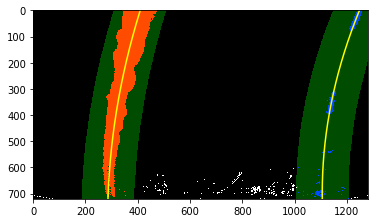

In [361]:
def findLinesLookAhead(binary_warped,margin):
    global left,right,n

    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    left_lane_inds = ((nonzerox > (left.best_fit[0]*(nonzeroy**2) + left.best_fit[1]*nonzeroy + left.best_fit[2] - margin)) & (nonzerox < (left.best_fit[0]*(nonzeroy**2) + left.best_fit[1]*nonzeroy + left.best_fit[2] + margin))) 
    right_lane_inds = ((nonzerox > (right.best_fit[0]*(nonzeroy**2) + right.best_fit[1]*nonzeroy + right.best_fit[2] - margin)) & (nonzerox < (right.best_fit[0]*(nonzeroy**2) + right.best_fit[1]*nonzeroy + right.best_fit[2] + margin)))  

    # Again, extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]
    # Fit a second order polynomial to each
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    # Generate x and y values for plotting
    
    if(leftx.size!=0):
        left.detected=True
        if (left.recent_xfitted!=[]):
            if (len(left.recent_xfitted)>n):
                left.recent_xfitted.pop(0)
            left.recent_xfitted.append(leftx)
            if (len(left.last_n_coefficients)>n):
                left.last_n_coefficients.pop(0)
            left.last_n_coefficients.append(np.asarray([left_fit[0],left_fit[1],left_fit[2]]))
        else:
            left.recent_xfitted.append(leftx)
            left.last_n_coefficients.append(np.asarray([left_fit[0],left_fit[1],left_fit[2]]))

        #left.bestx = np.mean(np.asarray(left.recent_xfitted), axis=0)
        left.best_fit = np.mean(np.asarray(left.last_n_coefficients), axis=0)
        left.current_fit = np.asarray([left_fit[0],left_fit[1],left_fit[2]])
        left.allx=leftx
        left.ally=lefty
    else:
        left.detected=False
        if (left.recent_xfitted!=[]):
            left.recent_xfitted.pop(0)
            left.last_n_coefficients.pop(0)

    if(rightx.size!=0):
        right.detected=True
        if (right.recent_xfitted!=[]):
            if (len(right.recent_xfitted)>n):
                right.recent_xfitted.pop(0)
            right.recent_xfitted.append(leftx)
            if (len(right.last_n_coefficients)>n):
                right.last_n_coefficients.pop(0)
            right.last_n_coefficients.append(np.asarray([right_fit[0],right_fit[1],right_fit[2]]))
        else:
            right.recent_xfitted.append(rightx)
            right.last_n_coefficients.append(np.asarray([right_fit[0],right_fit[1],right_fit[2]]))

        #right.bestx = np.mean(np.asarray(right.recent_xfitted), axis=0)
        right.best_fit = np.mean(np.asarray(right.last_n_coefficients), axis=0)
        right.current_fit = np.asarray([right_fit[0],right_fit[1],right_fit[2]])
        right.allx=rightx
        right.ally=righty
    else:
        right.detected=False
        if (right.recent_xfitted!=[]):
            right.recent_xfitted.pop(0)
            right.last_n_coefficients.pop(0)
                
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    left_fitx = left.best_fit[0]*ploty**2 + left.best_fit[1]*ploty + left.best_fit[2]
    right_fitx = right.best_fit[0]*ploty**2 + right.best_fit[1]*ploty + right.best_fit[2]
    return (binary_warped,left_lane_inds,right_lane_inds,left_fitx,right_fitx,margin,ploty,leftx,rightx,nonzerox,nonzeroy,left.best_fit,right.best_fit)
line=findLinesLookAhead(returnTransformedBinary(image,False),100)
visualizeLines(line[0],line[1],line[2],line[3],line[4],line[5],line[6],line[9],line[10],False)

In [327]:
def visualizeLines(binary_warped,left_lane_inds,right_lane_inds,left_fitx,right_fitx,margin,ploty,nonzerox,nonzeroy,returnLine=False):
    # Create an image to draw on and an image to show the selection window
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
    window_img = np.zeros_like(out_img)
    # Color in left and right line pixels
    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

    # Generate a polygon to illustrate the search window area
    # And recast the x and y points into usable format for cv2.fillPoly()
    left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
    left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, ploty])))])
    left_line_pts = np.hstack((left_line_window1, left_line_window2))
    right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
    right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, ploty])))])
    right_line_pts = np.hstack((right_line_window1, right_line_window2))

    cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
    cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
    result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)
    
    # Draw the lane onto the warped blank image
    if (returnLine):
        return result
    else:
        plt.imshow(result)
        plt.plot(left_fitx, ploty, color='yellow')
        plt.plot(right_fitx, ploty, color='yellow')
        plt.xlim(0, 1280)
        plt.ylim(720, 0)

In [364]:
global left, right, n
left =Line()
right = Line()
n=12

def giveFinalImage(im, showImages=False):
    binary_warped=returnTransformedBinary(im)
    flag=0
    try:
        if (left.detected==True & right.detected==True & ((abs(int((right.radius_of_curvature-left.radius_of_curvature)))/left.radius_of_curvature)<0.5)):
            line=findLinesLookAhead(binary_warped,100)
            flag=1
        else:
            line=findLinesFromScratch(binary_warped)
            flag=2
    except:
        line=findLinesFromScratch(binary_warped)  
        flag=3
    warp_zero = np.zeros_like(binary_warped).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))
    pts_left = np.array([np.transpose(np.vstack([line[3], line[6]]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([line[4], line[6]])))])
    pts = np.hstack((pts_left, pts_right))
    cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))
    newwarp = cv2.warpPerspective(color_warp, perspectiveMatrixInverse(im), (im.shape[1], im.shape[0])) 
    result = cv2.addWeighted(im, 1, newwarp, 0.3, 0)
    left.radius_of_curvature=measure_radius_of_curvature(line[3],binary_warped.shape[0])
    right.radius_of_curvature=measure_radius_of_curvature(line[4],binary_warped.shape[0])
    (position,distance_from_center)=get_distance_from_center(line[11],line[12])
    if position > 640:
        cv2.putText(result, 'Vehicle is {:.2f}m left of center'.format(distance_from_center), (100,80),fontFace = 16, fontScale = 2, color=(255,255,255), thickness = 3)
    else:
        cv2.putText(result, 'Vehicle is {:.2f}m right of center'.format(distance_from_center), (100,80),fontFace = 16, fontScale = 2, color=(255,255,255), thickness = 3)
        # Print radius of curvature on video
    cv2.putText(result, 'Radius of Curvature {}(m)'.format(int((left.radius_of_curvature+right.radius_of_curvature)/2)), (100,140),fontFace = 16, fontScale = 2, color=(255,255,255), thickness = 3)
    #cv2.putText(result, 'Left Radius of Curvature {}(m)'.format(int((left.radius_of_curvature))), (100,200),fontFace = 16, fontScale = 2, color=(255,255,255), thickness = 3)
    #cv2.putText(result, 'Right Radius of Curvature {}(m)'.format(int((right.radius_of_curvature))), (100,260),fontFace = 16, fontScale = 2, color=(255,255,255), thickness = 3)
    #cv2.putText(result, 'Diff Radius of Curvature {}(m)'.format(abs(int((right.radius_of_curvature-left.radius_of_curvature)))/left.radius_of_curvature), (100,320),fontFace = 16, fontScale = 2, color=(255,255,255), thickness = 3)
    #cv2.putText(result, 'Flag {}'.format(flag), (100,380),fontFace = 16, fontScale = 2, color=(255,255,255), thickness = 3)
    if showImages:
        f, (ax1, ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(20,40))
        ax1.imshow(im)
        ax2.imshow(binary_warped)
        ax3.imshow(visualizeLines(line[0],line[1],line[2],line[3],line[4],line[5],line[6],line[9],line[10],True))
        ax4.imshow(result)
    return result

In [365]:
### Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML
# Set up lines for left and right
white_output = 'project_video_answer.mp4'
clip1 = VideoFileClip("project_video.mp4")
white_clip = clip1.fl_image(giveFinalImage) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

[MoviePy] >>>> Building video project_video_answer.mp4
[MoviePy] Writing video project_video_answer.mp4



100%|█████████▉| 1260/1261 [07:20<00:00,  2.99it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_answer.mp4 

CPU times: user 7min 58s, sys: 1min 15s, total: 9min 13s
Wall time: 7min 24s


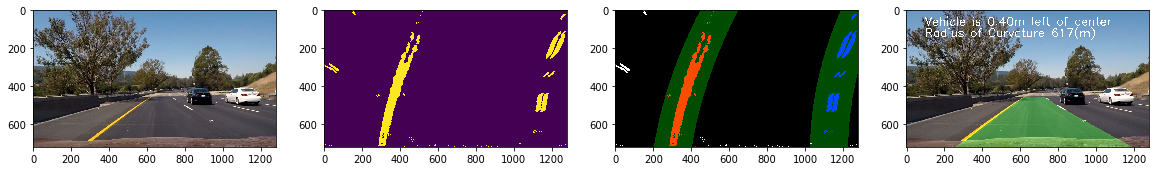

In [366]:
global left, right, n
left =Line()
right = Line()
n=12
im=cv2.resize(cv2.cvtColor(cv2.imread('test_images/test6.jpg'), cv2.COLOR_BGR2RGB), (1280, 720))
a=giveFinalImage(im,True)